In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df=pd.read_csv('data.csv')
df.head(3)

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,...,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,...,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,...,1,1,0,1,1,1,1,0,1,1


<AxesSubplot:xlabel='age_group', ylabel='count'>

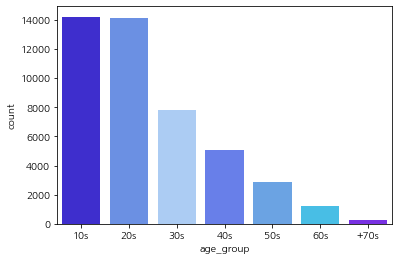

In [150]:
sns.countplot(x='age_group',data=df,order=['10s','20s','30s','40s','50s','60s','+70s'],palette=col)

<AxesSubplot:xlabel='age_group', ylabel='count'>

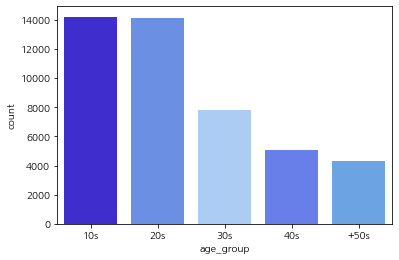

In [49]:
df.age_group=df.age_group.apply(lambda x:'+50s'if x in ['50s','60s','+70s'] else x)
sns.countplot(x='age_group',data=df,order=['10s','20s','30s','40s','+50s'],palette=col)

In [50]:
#7에 가까울수록 agree strongly, 0이 무응답으로 변환
df['tp01']=7-df['tp01']
df['tp02']=7-df['tp02']
df['tp03']=7-df['tp03']
df['tp04']=7-df['tp04']
df['tp05']=7-df['tp05']
df['tp06']=7-df['tp06']
df['tp07']=7-df['tp07']
df['tp08']=7-df['tp08']
df['tp09']=7-df['tp09']
df['tp10']=7-df['tp10']

# 성격특성이 연령대에 따라 다른 분포를 보일까?

## tp01: 외향적인, 열정적인 
- 연령대가 증가할수록 자신이 외향적이고 열정적이라고 생각하는 비율이 미약하게 증가
- 연령대에 따라 크게 달라지지는 않음

In [51]:
#tp01 무응답한 사람들 제거
tp01_df=df[df['tp01']!=0]
pivot1=pd.pivot_table(tp01_df,values='index',index='tp01',columns='age_group',aggfunc='count',margins=True)
pivot1=pivot1.reindex(['10s','20s','30s','40s','+50s'],axis=1)
pivot1

age_group,10s,20s,30s,40s,+50s
tp01,,,,,
1,1896,1901,1095,673,476
2,2478,2539,1392,820,713
3,1861,1935,1045,583,476
4,1155,1136,687,400,314
5,2504,2436,1332,908,697
6,2771,2699,1455,1087,1002
7,1496,1422,797,531,537
All,14161,14068,7803,5002,4215


In [52]:
#비율
pivot2=pivot1/pivot1.loc['All']*100
pivot3=pivot2.transpose()
pivot3

tp01,1,2,3,4,5,6,7,All
age_group,,,,,,,,
10s,13.388885,17.498764,13.141727,8.156204,17.682367,19.567827,10.564226,100.0
20s,13.512937,18.048052,13.754620,8.075064,17.315894,19.185385,10.108047,100.0
30s,14.033064,17.839293,13.392285,8.804306,17.070358,18.646674,10.214020,100.0
40s,13.454618,16.393443,11.655338,7.996801,18.152739,21.731307,10.615754,100.0
+50s,11.293001,16.915777,11.293001,7.449585,16.536180,23.772242,12.740214,100.0


In [53]:
plt.rcParams['font.family'] = 'NanumGothic'
col=['#2913E8','#5789F7','#A0CBFF','#5271FF','#57A2F7','#2ECBFF','#7214FF','#8771FF','#892EE8']

Text(0.5, 1.0, '활발하고 열정적인')

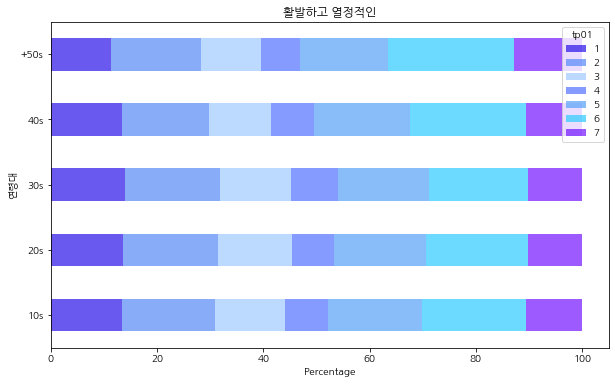

In [54]:
#분포 그래프
pivot3.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('활발하고 열정적인')

Text(0.5, 1.0, '활발하고 열정적인')

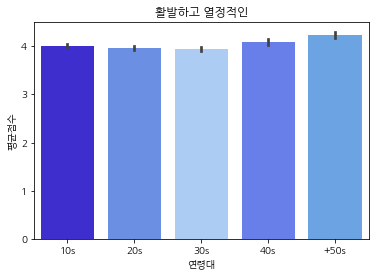

In [55]:
#평균
sns.barplot(data=tp01_df,x='age_group',y='tp01',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('활발하고 열정적인')

## tp02: 비판적인 싸우려드는
- 연령대가 증가함에 따라 자신이 비판적이고 싸우기를 좋아하는 성격이 아니라고 답하는 비율이 현저하게 증가
- 연령대별 차이가 뚜렷하게 나타남

In [56]:
#tp02 무응답한 사람들 제거
tp02_df=df[df['tp02']!=0]
pivot4=pd.pivot_table(tp02_df,values='index',index='tp02',columns='age_group',aggfunc='count',margins=True)
pivot4=pivot4.reindex(['10s','20s','30s','40s','+50s'],axis=1)
pivot4

age_group,10s,20s,30s,40s,+50s
tp02,,,,,
1,814,1154,901,756,989
2,1250,1460,988,849,793
3,1231,1230,794,515,428
4,1472,1170,637,369,273
5,3963,3925,2179,1386,1045
6,3223,3194,1486,798,507
7,2188,1923,821,330,176
All,14141,14056,7806,5003,4211


In [57]:
#비율
pivot5=pivot4/pivot4.loc['All']*100
pivot6=pivot5.transpose()
pivot6

tp02,1,2,3,4,5,6,7,All
age_group,,,,,,,,
10s,5.756311,8.839545,8.705184,10.409448,28.024892,22.791882,15.472739,100.0
20s,8.210017,10.387023,8.750711,8.323847,27.924018,22.723392,13.680990,100.0
30s,11.542403,12.656931,10.171663,8.160389,27.914425,19.036638,10.517551,100.0
40s,15.110933,16.969818,10.293824,7.375575,27.703378,15.950430,6.596042,100.0
+50s,23.486108,18.831631,10.163857,6.483021,24.815958,12.039896,4.179530,100.0


Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

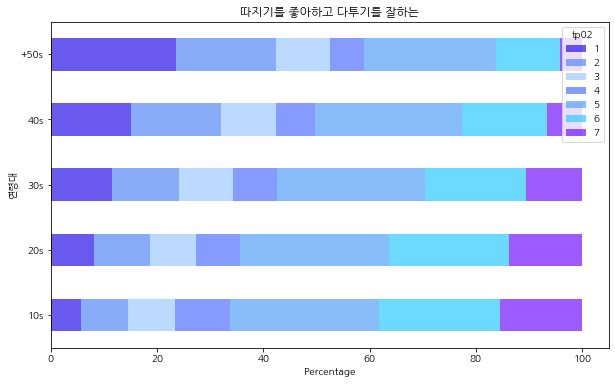

In [58]:
#분포 그래프
pivot6.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('따지기를 좋아하고 다투기를 잘하는')

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

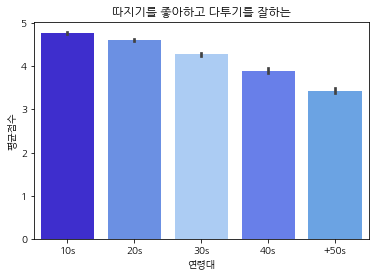

In [59]:
#평균
sns.barplot(data=tp02_df,x='age_group',y='tp02',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('따지기를 좋아하고 다투기를 잘하는')

# 교육수준이 영향을 미치는가? 
- 교육수준에 따라서 성격 특성이 다르게 나타나는가?(tp01,tp02)
> 1: 고등학교 미만<br>
> 2: 고등학교 졸업<br>
> 3: 학사 학위<br>
> 4: 석박사 학위

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

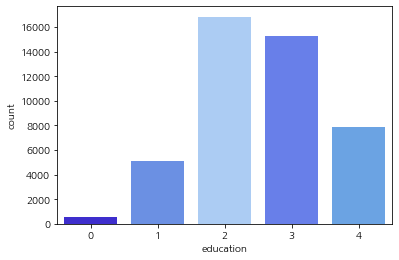

In [60]:
#교육수준 분포 보기
sns.countplot(df['education'],palette=col)

In [18]:
#일단 교육수준 무응답 제거
education_df=df[df['education']!=0]

## 교육수준이 외향적, 열정적 성격특성에 영향을 미치는가?

In [61]:
tp01_education_df=education_df[education_df['tp01']!=0] # tp01 무응답 제거
pivot7=pd.pivot_table(tp01_education_df,values='index',index='tp01',columns='education',aggfunc='count',margins=True)
pivot7

education,1,2,3,4,All
tp01,,,,,
1,728,2410,1936,888,5962
2,868,3015,2716,1249,7848
3,613,2250,1955,1010,5828
4,451,1389,1169,643,3652
5,864,3006,2635,1289,7794
6,981,3123,3098,1714,8916
7,554,1536,1626,1013,4729
All,5059,16729,15135,7806,44729


In [62]:
#비율
pivot8=pivot7/pivot7.loc['All']*100
pivot9=pivot8.transpose()
pivot9=pivot9.iloc[:4,:]
pivot9

tp01,1,2,3,4,5,6,7,All
education,,,,,,,,
1,14.390196,17.157541,12.117019,8.914805,17.078474,19.391184,10.950781,100.0
2,14.406121,18.022595,13.449698,8.302947,17.968797,18.668181,9.181661,100.0
3,12.791543,17.945160,12.917080,7.723819,17.409977,20.469111,10.743310,100.0
4,11.375865,16.000512,12.938765,8.237253,16.512939,21.957469,12.977197,100.0


Text(0.5, 1.0, '활발하고 열정적인')

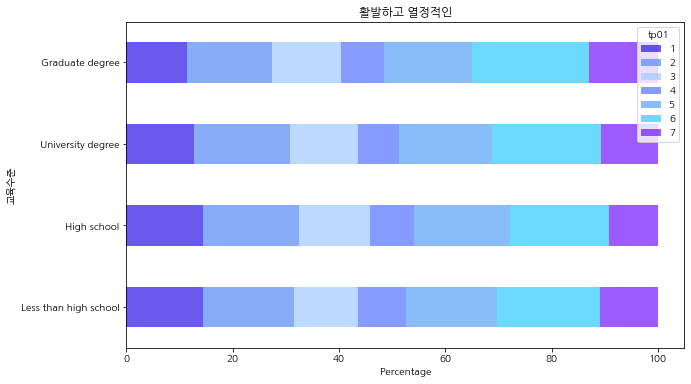

In [63]:
### 분포 그래프
pivot9.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.yticks([0,1,2,3,],['Less than high school','High school','University degree','Graduate degree'])
plt.title('활발하고 열정적인')

Text(0.5, 1.0, '활발하고 열정적인')

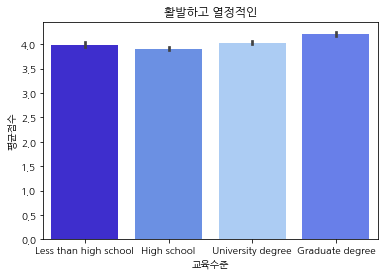

In [64]:
sns.barplot(data=tp01_education_df,x='education',y='tp01',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.xticks([0,1,2,3,],['Less than high school','High school','University degree','Graduate degree'])
plt.title('활발하고 열정적인')

## 교육수준이 비판적, 싸우려드는 성격특성에 영향을 미치는가?

In [65]:
tp02_education_df=education_df[education_df['tp02']!=0] # tp02 무응답 제거
pivot10=pd.pivot_table(tp02_education_df,values='index',index='tp02',columns='education',aggfunc='count',margins=True)
pivot10

education,1,2,3,4,All
tp02,,,,,
1,312,1393,1726,1128,4559
2,462,1775,1894,1154,5285
3,431,1460,1472,788,4151
4,565,1543,1134,630,3872
5,1414,4774,4145,2004,12337
6,1095,3575,3092,1357,9119
7,777,2189,1669,739,5374
All,5056,16709,15132,7800,44697


In [66]:
#비율
pivot11=pivot10/pivot10.loc['All']*100
pivot12=pivot11.transpose()
pivot12=pivot12.iloc[:4,:]
pivot12

tp02,1,2,3,4,5,6,7,All
education,,,,,,,,
1,6.170886,9.137658,8.524525,11.174842,27.966772,21.657437,15.367880,100.0
2,8.336824,10.623018,8.737806,9.234544,28.571429,21.395655,13.100724,100.0
3,11.406291,12.516521,9.727729,7.494052,27.392281,20.433518,11.029606,100.0
4,14.461538,14.794872,10.102564,8.076923,25.692308,17.397436,9.474359,100.0


Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

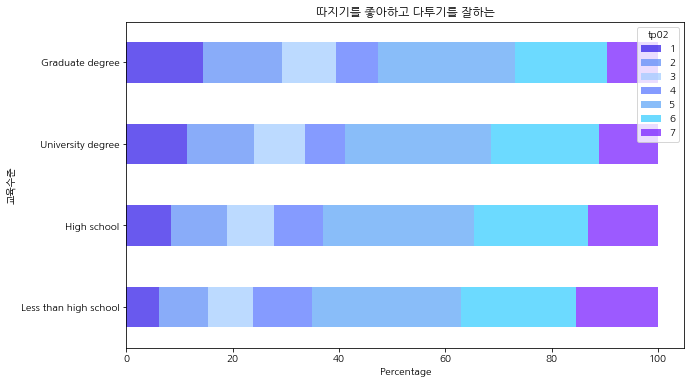

In [67]:
#분포 그래프
pivot12.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.yticks([0,1,2,3,],['Less than high school','High school','University degree','Graduate degree'])
plt.title('따지기를 좋아하고 다투기를 잘하는')

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

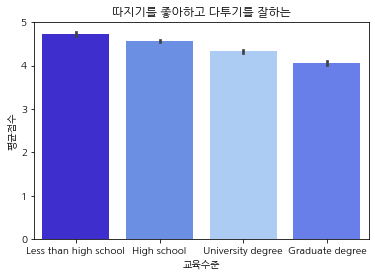

In [68]:
sns.barplot(data=tp02_education_df,x='education',y='tp02',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.xticks([0,1,2,3,],['Less than high school','High school','University degree','Graduate degree'])
plt.title('따지기를 좋아하고 다투기를 잘하는')

# 형제자매수가 영향을 미치는가? 
- 형제자매수에 따라서 성격 특성이 다르게 나타나는가?(tp01,tp02)

In [88]:
df=pd.read_csv('data.csv')

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='familysize', ylabel='count'>

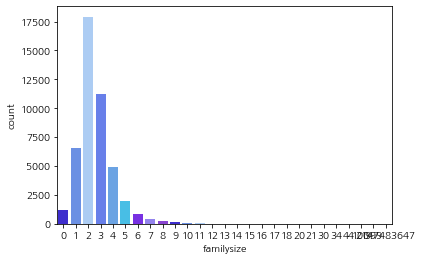

In [89]:
#형제자매수 분포보기
sns.countplot(df['familysize'],palette=col)

In [90]:
#13명이상의 이상치 제거
familysize_df=df[df.familysize<13]

C:\Users\rangc\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='familysize', ylabel='count'>

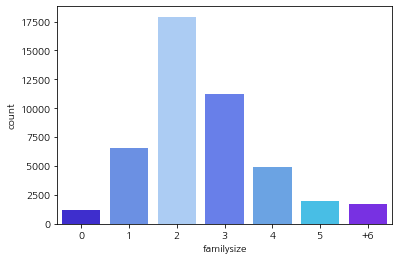

In [91]:
#5명 이상은 통합
familysize_df.familysize=familysize_df.familysize.apply(lambda x:'+6'if x>=6 else x)
sns.countplot(familysize_df['familysize'],order=[0,1,2,3,4,5,'+6'],palette=col)

## 형제자매수가 외향적, 열정적 성격특성에 영향을 미치는가?

In [94]:
tp01_familysize_df=familysize_df[familysize_df['tp01']!=0] # tp01 무응답 제거
pivot13=pd.pivot_table(data=tp01_familysize_df,values='index',index='tp01',columns='familysize',aggfunc='count',margins=True)
pivot13

familysize,0,1,2,3,4,5,+6,All
tp01,,,,,,,,
1,235,1280,3509,2232,1031,392,326,9005
2,212,1107,3045,1991,829,373,312,7869
3,110,540,1441,917,370,167,145,3690
4,146,834,2406,1456,623,229,200,5894
5,200,1173,3198,1928,842,343,252,7936
6,165,886,2396,1439,656,256,235,6033
7,12,38,88,70,33,18,23,282
All,1080,5858,16083,10033,4384,1778,1493,40709


In [97]:
#비율
pivot14=pivot13/pivot13.loc['All']*100
pivot15=pivot14.transpose()
pivot15=pivot15.iloc[:7,:]
pivot15

tp01,1,2,3,4,5,6,7,All
familysize,,,,,,,,
0,21.759259,19.629630,10.185185,13.518519,18.518519,15.277778,1.111111,100.0
1,21.850461,18.897235,9.218163,14.236941,20.023899,15.124616,0.648686,100.0
2,21.818069,18.933035,8.959771,14.959896,19.884350,14.897718,0.547162,100.0
3,22.246586,19.844513,9.139839,14.512110,19.216585,14.342669,0.697698,100.0
4,23.517336,18.909672,8.439781,14.210766,19.206204,14.963504,0.752737,100.0
5,22.047244,20.978628,9.392576,12.879640,19.291339,14.398200,1.012373,100.0
+6,21.835231,20.897522,9.711989,13.395847,16.878768,15.740121,1.540522,100.0


Text(0.5, 1.0, '활발하고 열정적인')

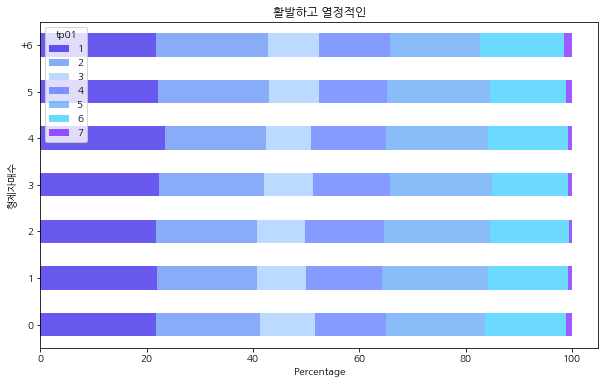

In [98]:
#분포 그래프
pivot15.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('활발하고 열정적인')

Text(0.5, 1.0, '활발하고 열정적인')

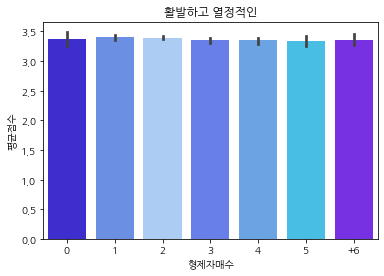

In [101]:
#평균비교
sns.barplot(data=tp01_familysize_df,x='familysize',y='tp01',order=[0,1,2,3,4,5,'+6'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('활발하고 열정적인')

## 형제자매수가 비판적, 싸우려드는 성격특성에 영향을 미치는가?


In [103]:
tp02_familysize_df=familysize_df[familysize_df['tp02']!=0] # tp02 무응답 제거
pivot16=pd.pivot_table(tp02_familysize_df,values='index',index='tp02',columns='familysize',aggfunc='count',margins=True)
pivot16

familysize,0,1,2,3,4,5,+6,All
tp02,,,,,,,,
1,272,1431,3768,2231,899,348,256,9205
2,315,1749,4949,3153,1348,523,447,12484
3,124,538,1570,935,405,190,150,3912
4,105,538,1664,1084,467,183,154,4195
5,124,710,2039,1334,622,251,253,5333
6,94,635,1631,1142,600,259,246,4607
7,12,45,86,82,41,24,24,314
All,1046,5646,15707,9961,4382,1778,1530,40050


In [104]:
#비율
pivot17=pivot16/pivot16.loc['All']*100
pivot18=pivot17.transpose()
pivot18=pivot18.iloc[:7,:]
pivot18

tp02,1,2,3,4,5,6,7,All
familysize,,,,,,,,
0,26.003824,30.114723,11.854685,10.038241,11.854685,8.986616,1.147228,100.0
1,25.345377,30.977683,9.528870,9.528870,12.575275,11.246900,0.797024,100.0
2,23.989304,31.508245,9.995543,10.594003,12.981473,10.383905,0.547527,100.0
3,22.397350,31.653448,9.386608,10.882442,13.392230,11.464712,0.823211,100.0
4,20.515746,30.762209,9.242355,10.657234,14.194432,13.692378,0.935646,100.0
5,19.572553,29.415073,10.686164,10.292463,14.116985,14.566929,1.349831,100.0
+6,16.732026,29.215686,9.803922,10.065359,16.535948,16.078431,1.568627,100.0


Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

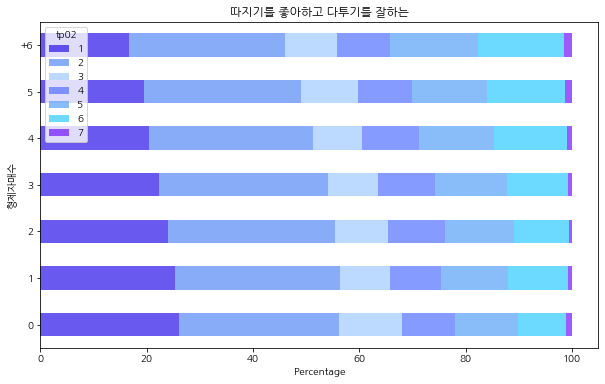

In [106]:
#분포 그래프
pivot18.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('따지기를 좋아하고 다투기를 잘하는')

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

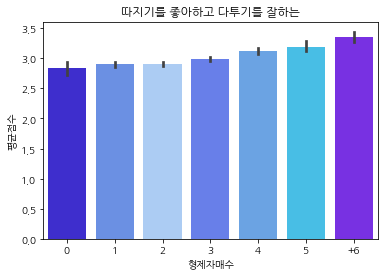

In [108]:
#평균
sns.barplot(data=tp02_familysize_df,x='familysize',y='tp02',order=[0,1,2,3,4,5,'+6'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('따지기를 좋아하고 다투기를 잘하는')

# 혼인상태가 영향을 미치는가? 
- 혼인상태에 따라서 성격 특성이 다르게 나타나는가?(tp01,tp02)
> 1: 미혼<br>
> 2: 기혼(현재 결혼상태)<br>
> 3: 이혼(이전에 결혼)<br>

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='married', ylabel='count'>

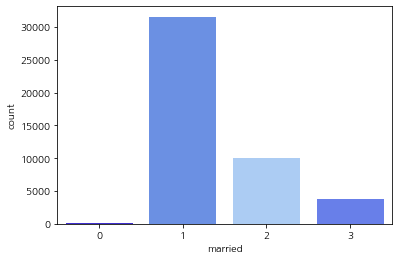

In [109]:
sns.countplot(df['married'],palette=col)

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x200b02032b0>,
 [Text(0, 0, 'never'), Text(1, 0, 'currently'), Text(2, 0, 'previously')])

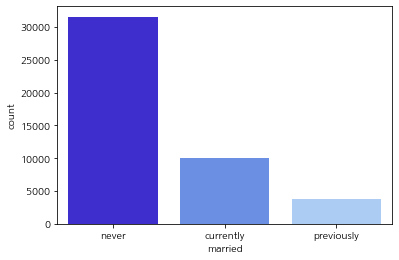

In [110]:
married_df=df[df['married']!=0]
a=sns.countplot(married_df['married'],palette=col)
plt.xticks([0,1,2],['never','currently','previously'])

## 혼인상태가 외향적, 열정적 성격특성에 영향을 미치는가?

In [111]:
tp01_married_df=married_df[married_df['tp01']!=0] # tp01 무응답 제거
pivot19=pd.pivot_table(tp01_married_df,values='index',index='tp01',columns='married',aggfunc='count',margins=True)
pivot19

married,1,2,3,All
tp01,,,,
1,5985,2209,801,8995
2,5440,1729,693,7862
3,2617,790,281,3688
4,4223,1233,431,5887
5,5674,1635,623,7932
6,4361,1193,474,6028
7,118,98,66,282
All,28418,8887,3369,40674


In [112]:
#비율
pivot20=pivot19/pivot19.loc['All']*100
pivot21=pivot20.transpose()
pivot21=pivot21.iloc[:3,:]
pivot21

tp01,1,2,3,4,5,6,7,All
married,,,,,,,,
1,21.060595,19.142797,9.208952,14.860300,19.966219,15.345908,0.415230,100.0
2,24.856532,19.455384,8.889389,13.874198,18.397660,13.424103,1.102734,100.0
3,23.775601,20.569902,8.340754,12.793114,18.492134,14.069457,1.959038,100.0


Text(0.5, 1.0, '활발하고 열정적인')

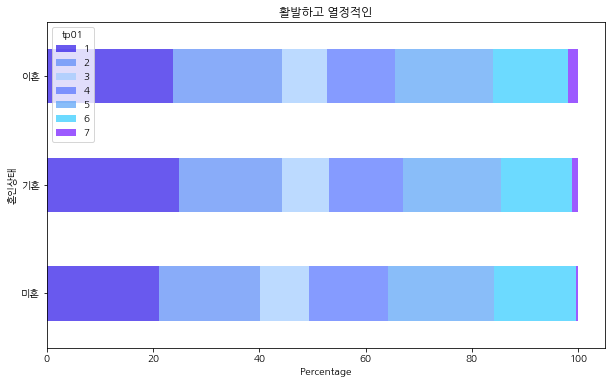

In [126]:
#분포 그래프
pivot21.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('혼인상태')
plt.yticks([0,1,2,],['미혼','기혼','이혼'])
plt.title('활발하고 열정적인')

Text(0.5, 1.0, '활발하고 열정적인')

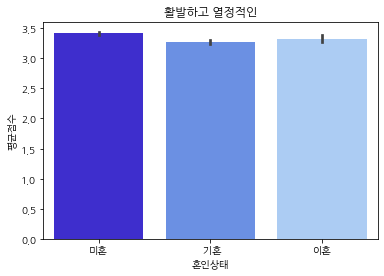

In [129]:
#평균
sns.barplot(data=tp01_married_df,x='married',y='tp01',order=[1,2,3],palette=col)
plt.xticks([0,1,2,],['미혼',' 기혼', '이혼'])
plt.ylabel('평균점수')
plt.xlabel('혼인상태')
plt.title('활발하고 열정적인')

## 혼인상태가 비판적, 싸우려드는 성격특성에 영향을 미치는가?


In [130]:
tp02_married_df=married_df[married_df['tp02']!=0] # tp02 무응답 제거
pivot22=pd.pivot_table(tp02_married_df,values='index',index='tp02',columns='married',aggfunc='count',margins=True)
pivot22

married,1,2,3,All
tp02,,,,
1,6988,1677,520,9185
2,8814,2686,968,12468
3,2892,755,265,3912
4,2775,1062,357,4194
5,3127,1496,707,5330
6,2395,1499,713,4607
7,143,101,69,313
All,27134,9276,3599,40009


In [131]:
#비율
pivot23=pivot22/pivot22.loc['All']*100
pivot24=pivot23.transpose()
pivot24=pivot24.iloc[:3,:]
pivot24

tp02,1,2,3,4,5,6,7,All
married,,,,,,,,
1,25.753667,32.483231,10.658215,10.227021,11.524287,8.826564,0.527014,100.0
2,18.078913,28.956447,8.139284,11.448900,16.127641,16.159983,1.088831,100.0
3,14.448458,26.896360,7.363156,9.919422,19.644346,19.811059,1.917199,100.0


Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

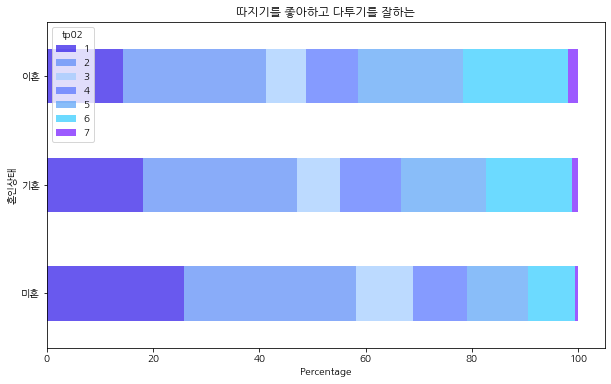

In [133]:
#분포 그래프
pivot24.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('혼인상태')
plt.yticks([0,1,2],['미혼','기혼','이혼'])
plt.title('따지기를 좋아하고 다투기를 잘하는')

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

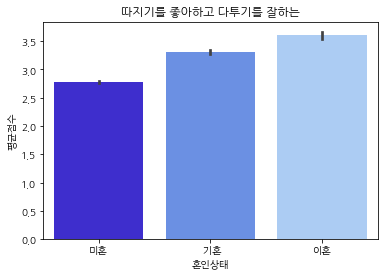

In [134]:
#평균
sns.barplot(data=tp02_married_df,x='married',y='tp02',order=[1,2,3],palette=col)
plt.xticks([0,1,2,],['미혼',' 기혼', '이혼'])
plt.ylabel('평균점수')
plt.xlabel('혼인상태')
plt.title('따지기를 좋아하고 다투기를 잘하는')

# 유년기 거주지역이 영향을 미치는가?
- 유년기 거주지역에 따라서 성격 특성이 다르게 나타나는가?(tp01,tp02)
> 1: rural<br>
> 2: suburban<br>
> 3: urban<br>

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='urban', ylabel='count'>

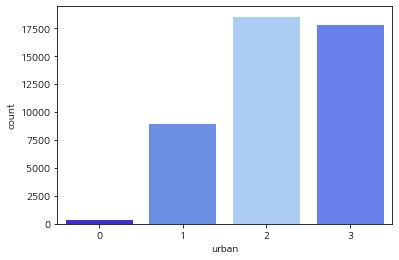

In [135]:
sns.countplot(df['urban'],palette=col)

C:\Users\rangc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x200b5d7ffd0>,
 [Text(0, 0, 'rural'), Text(1, 0, 'suburban'), Text(2, 0, 'urban')])

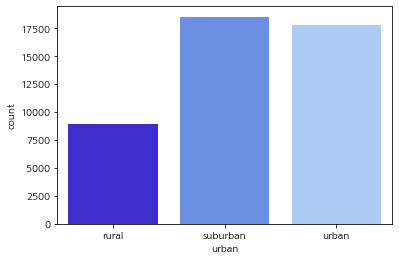

In [136]:
urban_df=df[df['urban']!=0]
a=sns.countplot(urban_df['urban'],palette=col)
plt.xticks([0,1,2],['rural','suburban','urban'])

## 유년기 거주지역이 외향적, 열정적 성격특성에 영향을 미치는가

In [137]:
tp01_urban_df=urban_df[urban_df['tp01']!=0] # tp01 무응답 제거
pivot25=pd.pivot_table(tp01_urban_df,values='index',index='tp01',columns='urban',aggfunc='count',margins=True)
pivot25

urban,1,2,3,All
tp01,,,,
1,1583,3589,3787,8959
2,1554,3124,3140,7818
3,754,1442,1464,3660
4,1192,2466,2202,5860
5,1575,3483,2835,7893
6,1292,2468,2247,6007
7,68,84,127,279
All,8018,16656,15802,40476


In [138]:
#비율
pivot26=pivot20/pivot20.loc['All']*100
pivot27=pivot26.transpose()
pivot27=pivot27.iloc[:3,:]
pivot27

tp01,1,2,3,4,5,6,7,All
married,,,,,,,,
1,21.060595,19.142797,9.208952,14.860300,19.966219,15.345908,0.415230,100.0
2,24.856532,19.455384,8.889389,13.874198,18.397660,13.424103,1.102734,100.0
3,23.775601,20.569902,8.340754,12.793114,18.492134,14.069457,1.959038,100.0


Text(0.5, 1.0, '활발하고 열정적인')

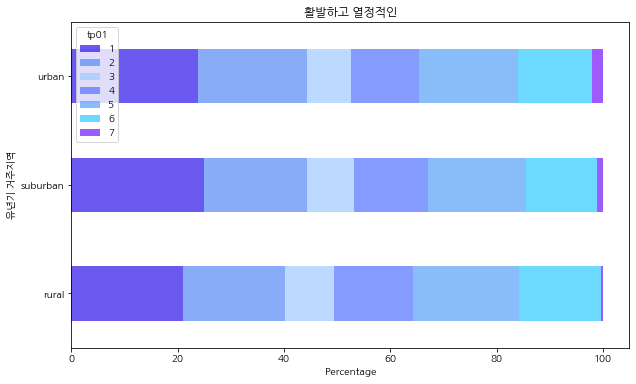

In [139]:
#분포 그래프
pivot27.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('유년기 거주지역')
plt.yticks([0,1,2],['rural','suburban','urban'])
plt.title('활발하고 열정적인')

Text(0.5, 1.0, '활발하고 열정적인')

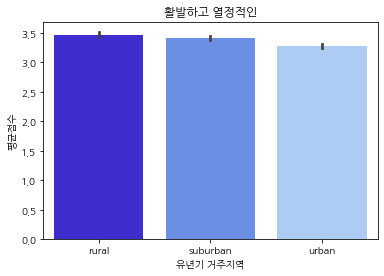

In [145]:
#평균
b=sns.barplot(data=tp01_urban_df,x='urban',y='tp01',order=[1,2,3],palette=col)
plt.xticks([0,1,2],['rural','suburban','urban'])
plt.ylabel('평균점수')
plt.xlabel('유년기 거주지역')
plt.title('활발하고 열정적인')

## 유년기 거주지역이 비판적, 싸우려드는 성격특성에 영향을 미치는가?

In [141]:
tp02_urban_df=urban_df[urban_df['tp02']!=0] # tp02 무응답 제거
pivot28=pd.pivot_table(tp02_urban_df,values='index',index='tp02',columns='urban',aggfunc='count',margins=True) #개수세기
#비율
pivot29=pivot28/pivot28.loc['All']*100
pivot30=pivot29.transpose()
pivot30=pivot30.iloc[:3,:]
pivot30

tp02,1,2,3,4,5,6,7,All
urban,,,,,,,,
1,22.005044,30.718789,9.785624,10.277427,14.060530,12.156368,0.996217,100.0
2,22.320180,31.981516,9.247887,11.400255,13.206056,11.296893,0.547212,100.0
3,24.233586,30.526930,10.311751,9.611770,13.014453,11.381165,0.920345,100.0


Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

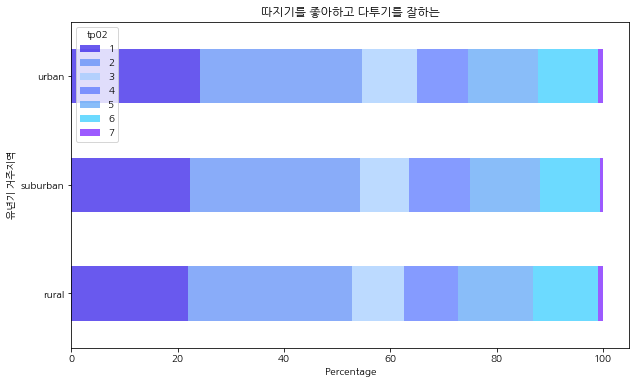

In [143]:
#분포 그래프
pivot30.iloc[:,0:7].plot(kind='barh',figsize=(10,6),stacked=True,alpha=0.7,color=col)
plt.xlabel('Percentage')
plt.ylabel('유년기 거주지역')
plt.yticks([0,1,2],['rural','suburban','urban'])
plt.title('따지기를 좋아하고 다투기를 잘하는')

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

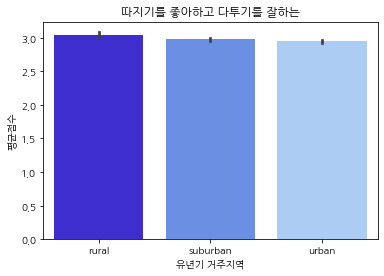

In [146]:
#평균
b=sns.barplot(data=tp02_urban_df,x='urban',y='tp02',order=[1,2,3],palette=col)
plt.xticks([0,1,2],['rural','suburban','urban'])
plt.ylabel('평균점수')
plt.xlabel('유년기 거주지역')
plt.title('따지기를 좋아하고 다투기를 잘하는')

In [ ]:
#요인분석(성격특성에 어떤 요인이 영향을 많이 끼치는가?), ANOVA